<a href="https://colab.research.google.com/github/Mohammedyounus21/colab/blob/main/Master_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flask

## "Hello, World!" in Flask

In [ ]:
# Import Flask and create an instance
from flask import Flask

app = Flask(__name__)  # Initialize the Flask application

# Define a route
@app.route("/")  # This maps the '/' URL to this function
def hello_world():
    return "Hello, World!"  # Response for the browser

# Run the application
if __name__ == "__main__":
    app.run(debug=True)  # Start the Flask server in debug mode


## Multiple Routing

In [ ]:
# Multiple Routes Example
@app.route("/about")
def about():
    return "This is the About Page!"

@app.route("/contact")
def contact():
    return "This is the Contact Page!"


## Dynamic Routing

In [ ]:
@app.route("/welcome/<username>")
def greet_user(username):
    return f"Hello, {username}!"

## Handling Requests In Flask

In [ ]:
from flask import request

@app.route("/login", methods=["GET", "POST"])
def login():
    if request.method == "POST":
        username = request.form.get("username")
        return f"Welcome, {username}!"
    return '''
        <form method="post">
            Username: <input type="text" name="username">
            <input type="submit">
        </form>
    '''

## Templates In Flask


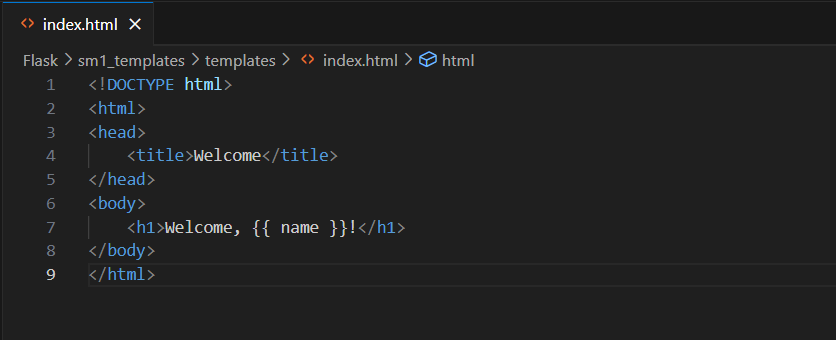

In [ ]:
from flask import render_template

@app.route("/welcome/<name>")
def welcome(name):
    return render_template("index.html", name=name)

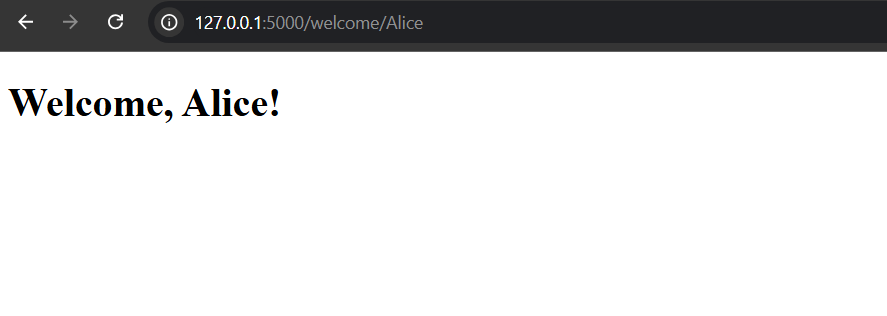

## Static Files In Flask


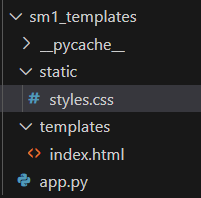


Link static files in your templates. Save a CSS file as `static/styles.css`:
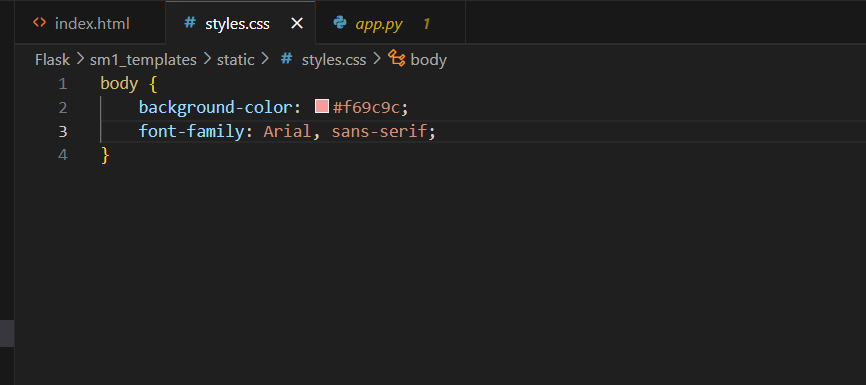

In [ ]:
from flask import render_template

@app.route("/welcome/<name>")
def welcome(name):
    return render_template("index.html", name=name)

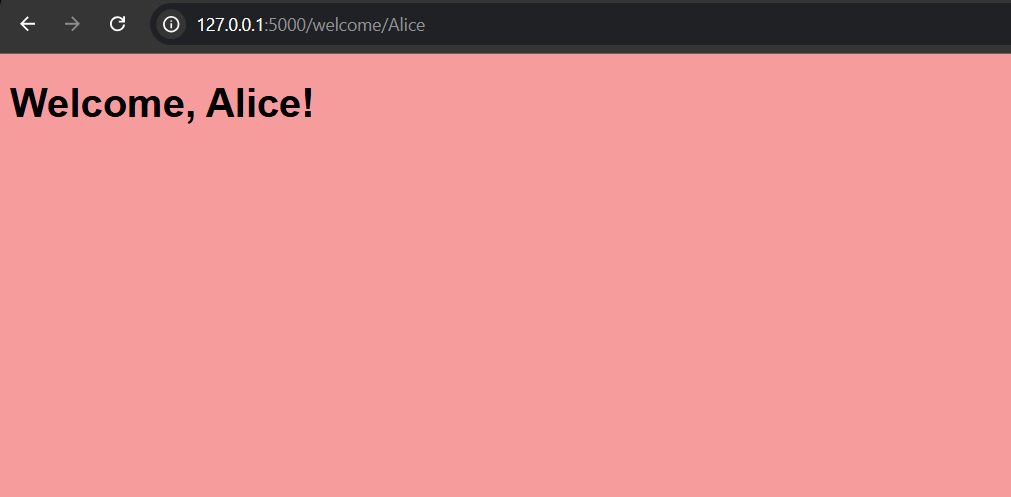

## Handling Basic Forms

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route("/submit", methods=["GET", "POST"])
def submit_form():
    if request.method == "POST":  # If the form is submitted
        name = request.form.get("name")  # Get the 'name' field from the form
        return f"Thank you, {name}!"  # Respond with a thank-you message
    # HTML Form (displayed when the user accesses the page with GET)
    return '''
        <form method="post">
            Name: <input type="text" name="name">  <!-- Text input field -->
            <input type="submit">  <!-- Submit button -->
        </form>
    '''

if __name__ == "__main__":
    app.run(debug=True)



## Authentication and Authorization

### Example: Using JWTs for Authentication

```bash
pip install flask-jwt-extended
```

In [ ]:
from flask import Flask, jsonify, request, render_template
from flask_jwt_extended import JWTManager, create_access_token, jwt_required, get_jwt_identity,decode_token
app = Flask(__name__)
app.config["JWT_SECRET_KEY"] = "12087538720"  # Change this to a secure key
jwt = JWTManager(app)

# Sample users
users = {"admin": "password123"}  # A dictionary storing username-password pairs

# Login form page
@app.route("/login-page", methods=["GET"])
def login_page():
    return render_template("login.html")

# Login endpoint
@app.route("/login", methods=["POST"])
def login():
    username = request.form.get("username")  # Get username from form data
    password = request.form.get("password")  # Get password from form data
    if username in users and users[username] == password:
        token = create_access_token(identity=username)  # Create JWT for the user
        return jsonify({"access_token": token})
    return jsonify({"error": "Invalid credentials"}), 401

@app.route("/protected", methods=["GET"])
@jwt_required(optional=True)  # Allow optional JWT for query-based token
def protected():
    token = request.args.get("token")
    if token:
        try:

            decoded = decode_token(token)
            user = decoded["sub"]
            return jsonify({"message": f"Hello, {user}! You have access to this route!"})
        except Exception:
            return jsonify({"error": "Invalid token"}), 401

    return jsonify({"msg": "Missing Authorization Header or token"}), 401

if __name__ == "__main__":
    app.run(debug=True)

Here is the code for Login.html



```html
<!DOCTYPE html>
<html>
<head>
    <title>Login</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f9f9f9;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
        }
        .login-container {
            background: white;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            width: 300px;
        }
        .login-container h1 {
            margin-bottom: 20px;
            text-align: center;
            font-size: 24px;
        }
        .login-container label {
            display: block;
            margin-bottom: 5px;
            font-weight: bold;
        }
        .login-container input {
            width: 100%;
            padding: 10px;
            margin-bottom: 15px;
            border: 1px solid #ddd;
            border-radius: 5px;
        }
        .login-container button {
            width: 100%;
            padding: 10px;
            background-color: #4CAF50;
            color: white;
            border: none;
            border-radius: 5px;
            cursor: pointer;
        }
        .login-container button:hover {
            background-color: #45a049;
        }
    </style>
</head>
<body>
    <div class="login-container">
        <h1>Login</h1>
        <form action="/login" method="POST">
            <label for="username">Username:</label>
            <input type="text" id="username" name="username" required>

            <label for="password">Password:</label>
            <input type="password" id="password" name="password" required>

            <button type="submit">Login</button>
        </form>
    </div>
</body>
</html>

```



# Streamlit

## Your First Streamlit App

In [ ]:
import streamlit as st

# Title for the app
st.title("Hello, Streamlit!")

# Adding a header
st.header("Welcome to my first Streamlit app!")

# Adding some text
st.write("This is a simple example of a Streamlit application.")

### Running The App

```bash
streamlit run app.py
```

## Adding Input Widgets

In [ ]:
import streamlit as st

st.title("Interactive Widgets in Streamlit")

# Adding a text input widget
name = st.text_input("Enter your name:")

# Adding a slider
age = st.slider("Select your age:", 0, 100, 25)

# Displaying the input data
st.write(f"Hello, {name}! You are {age} years old.")

## Displaying DataFrame

In [ ]:
import streamlit as st
import pandas as pd

st.title("Displaying Data in Streamlit")

# Creating a sample DataFrame
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "Country": ["USA", "Canada", "UK"]
}
df = pd.DataFrame(data)

# Displaying the DataFrame
st.write("Here is a sample DataFrame:")
st.dataframe(df)

# Highlighting the maximum value in the "Age" column
st.dataframe(df.style.highlight_max(subset=['Age'], color='green'))

## Adding Charts


In [ ]:
import streamlit as st
import pandas as pd

# Set the title of the app
st.title("Weekly Step Count Tracker")

# Create a simple dataset
data = pd.DataFrame({
    "Day": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "Steps": [5000, 7000, 8000, 6000, 10000, 12000, 9000]
})

# Set 'Day' as the index for the chart
data.set_index("Day", inplace=True)

# Display the line chart
st.line_chart(data)


## File Uploads

In [ ]:
import streamlit as st
import pandas as pd

st.title("File Upload Example")

# Uploading a file
uploaded_file = st.file_uploader("Choose a file", type=["csv", "xlsx"])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write("Uploaded Data:")
    st.dataframe(df)

## Sidebar Widgets

In [ ]:
import streamlit as st

st.title("Sidebar Example")

# Adding widgets to the sidebar
sidebar_option = st.sidebar.selectbox(
    "Choose an option:",
    ["Option 1", "Option 2", "Option 3"]
)

st.sidebar.write("This is a sidebar!")
st.write(f"You selected: {sidebar_option}")


## Displaying Images

In [ ]:
import streamlit as st
from PIL import Image

st.title("Image Example")

# Loading and displaying an image
image = Image.open("image.jpg")
st.image(image, caption="Vishwa Mohan",width=450)

## Basic Map With Streamlit

In [ ]:
import streamlit as st
import pandas as pd

# Sample real-world locations
data = pd.DataFrame({
    'lat': [40.7128, 34.0522, 51.5074, 48.8566, -33.8688],
    'lon': [-74.0060, -118.2437, -0.1276, 2.3522, 151.2093],
    'city': ['New York', 'Los Angeles', 'London', 'Paris', 'Sydney']
})

st.write("### Major Cities of the World")
st.map(data)


## Form Submission

In [ ]:
import streamlit as st

with st.form("my_form"):
    name = st.text_input("Name")
    age = st.number_input("Age", 0, 100)
    submitted = st.form_submit_button("Submit")

if submitted:
    st.write(f"Hello {name}, you are {age} years old!")


## Download Buttons

In [ ]:
import streamlit as st
import pandas as pd

data = pd.DataFrame({'Name': ['Alice', 'Bob'], 'Age': [25, 30]})
csv = data.to_csv(index=False)

st.dataframe(data)

st.download_button(
    label="Download Data as CSV",
    data=csv,
    file_name="data.csv",
    mime="text/csv"
)